In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import SimpleRNN, LSTM, GRU
from keras.optimizers import SGD, Nadam, Adam, RMSprop
from keras.callbacks import TensorBoard
from keras.utils import np_utils
import matplotlib.pyplot as plt 
import scipy.io 
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline
X_test = np.load("../data/X_test.npy")
y_test = np.load("../data/y_test.npy")
person_train_valid = np.load("../data/person_train_valid.npy")
X_train_valid = np.load("../data/X_train_valid.npy")
y_train_valid = np.load("../data/y_train_valid.npy")
person_test = np.load("../data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = '../data/X_test.npy'
y_test_dir = '../data/y_test.npy' 
X_train_valid_dir = '../data/X_train_valid.npy' 
y_train_valid_dir = '../data/y_train_valid.npy'
X_test_dsample_dir = '../data/X_test_downsample.npy'
y_test_dsample_dir = '../data/y_test_downsample.npy' 
X_train_valid_dsample_dir = '../data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = '../data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)
print ('Training/Valid data shape: {}'.format(X_train_valid_ds.shape))
print ('Test data shape: {}'.format(X_test_ds.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid_ds.shape))
print ('Test target shape: {}'.format(y_test_ds.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)
Training/Valid data shape: (4230, 22, 500)
Test data shape: (886, 22, 500)
Training/Valid target shape: (4230,)
Test target shape: (886,)


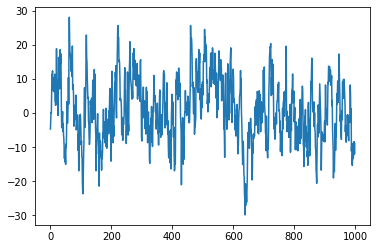

In [24]:
plot = plt.plot(X_train_valid[2,1,:])

(2115, 1000, 22)
(443, 1000, 22)


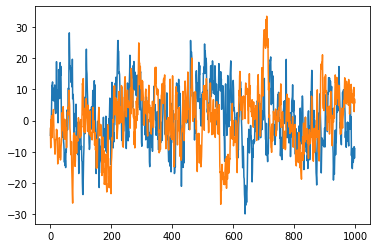

In [42]:

x_train = X_train_valid.swapaxes(1,2)
x_train = x_train.astype('float32')
print(x_train.shape)
plot = plt.plot(x_train[2,:,1])
y_train = y_train_valid-769


x_test = X_test.swapaxes(1,2)
x_test = x_test.astype('float32')
print(x_test.shape)
plot = plt.plot(x_test[2,:,1])
y_test = y_test-769

In [38]:
model = Sequential() 
model.add(LSTM(32,return_sequences=True,input_shape=(1000,22)))
model.add(LSTM(16,return_sequences=True))
model.add(LSTM(5))
model.add(Dense(4,activation='softmax'))
model.summary()
optim = Nadam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optim,metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 1000, 32)          7040      
_________________________________________________________________
lstm_16 (LSTM)               (None, 1000, 16)          3136      
_________________________________________________________________
lstm_17 (LSTM)               (None, 5)                 440       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 24        
Total params: 10,640
Trainable params: 10,640
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train,y_train,epochs=15,batch_size=20)

Epoch 1/15
106/106 [==============================] - 37s 331ms/step - loss: 1.3894 - accuracy: 0.2762
Epoch 2/15
106/106 [==============================] - 35s 330ms/step - loss: 1.3831 - accuracy: 0.2617
Epoch 3/15
106/106 [==============================] - 35s 331ms/step - loss: 1.3695 - accuracy: 0.3064
Epoch 4/15
106/106 [==============================] - 35s 331ms/step - loss: 1.3598 - accuracy: 0.3047
Epoch 5/15
106/106 [==============================] - 35s 331ms/step - loss: 1.3536 - accuracy: 0.3301
Epoch 6/15
106/106 [==============================] - 35s 331ms/step - loss: 1.3375 - accuracy: 0.3424
Epoch 7/15
106/106 [==============================] - 35s 331ms/step - loss: 1.3149 - accuracy: 0.3888
Epoch 8/15
106/106 [==============================] - 35s 333ms/step - loss: 1.3068 - accuracy: 0.3959
Epoch 9/15
106/106 [==============================] - 35s 332ms/step - loss: 1.2930 - accuracy: 0.3991
Epoch 10/15
106/106 [==============================] - 35s 332ms/step - l

In [46]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=1)
print('测试得分:', score)
print('测试精度:', acc)

443/443 [==============================] - 20s 44ms/step - loss: 1.5863 - accuracy: 0.2415
测试得分: 1.5862576961517334
测试精度: 0.2415349930524826


In [3]:


import numpy as np
import pandas as pd
import scipy.stats as scs
import re
from numpy import genfromtxt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, Conv2D,LSTM, BatchNormalization, MaxPooling1D, MaxPooling2D,Reshape
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from scipy import signal
# Model parameters
dropout = 0.5
learning_rate = 1e-3
epochs = 100

#Building the model

cnn_lstm_model = Sequential()

# First block of conv.
cnn_lstm_model.add(Conv2D(filters=25, kernel_size=(10,1), padding='same', activation='elu', input_shape=(1000,1,22)))
cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(dropout))

# Second block of conv.
cnn_lstm_model.add(Conv2D(filters=50, kernel_size=(10,1), padding='same', activation='elu'))
cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(dropout))

# Third block of conv.
cnn_lstm_model.add(Conv2D(filters=100, kernel_size=(10,1), padding='same', activation='elu'))
cnn_lstm_model.add(MaxPooling2D(pool_size=(3,1), padding='same'))
cnn_lstm_model.add(BatchNormalization())
cnn_lstm_model.add(Dropout(dropout))

# FC+LSTM layer
cnn_lstm_model.add(Flatten())
cnn_lstm_model.add(Dense((50)))
cnn_lstm_model.add(Reshape((50,1)))
cnn_lstm_model.add(LSTM(10, dropout=0.5, recurrent_dropout=0.5, input_shape=(50,1), return_sequences=False))

# FC layer
cnn_lstm_model.add(Dense(4, activation='softmax'))



# Defining the optimizer
optimizer = keras.optimizers.Adam(lr=learning_rate)

# Compiling the model
cnn_lstm_model.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

# Printing the model summary
cnn_lstm_model.summary()

# Training and validating the model

cnn_lstm_results = cnn_lstm_model.fit(X_train_valid_ds,
             y_train_valid_ds,
             batch_size=64,
             epochs=epochs,
             validation_data=(X_test_ds, y_test_ds), verbose=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1000, 1, 25)       5525      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 334, 1, 25)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 334, 1, 25)        100       
_________________________________________________________________
dropout (Dropout)            (None, 334, 1, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 334, 1, 50)        12550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 1, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 1, 50)       

ValueError: in user code:

    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/dy/Desktop/c247_project/.venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 22, 500)


In [6]:
import project_path
from data.data_util import *
X_train = load_data('X_train_val',downsampled=True,
                    band_pass_range=('01','45'),
                    norm=False,data_dir='../data/band_pass_data')